<a href="https://colab.research.google.com/github/Hugo-Andres/Data-Analytics-Science/blob/main/Prediccion_Dataset_Titanic_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importamos Librerias a utilizar**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files 

**Archivos descargados de la página: Kaggle**

**Abrimos los archivos**

In [ ]:
files.upload()

In [ ]:
files.upload()

In [ ]:
files.upload()

**Leemos los Datasets**

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submission = pd.read_csv("gender_submission.csv")

**Lo que queremos es hacer predicciones sobre quién sobrevivió y quién no.**

**Vista General de los datasets**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Podemos ver que faltan datos en las columnas "Cabina", "Edad", "Embarque", en ambos conjuntos de datos, y que el conjunto de datos de prueba tiene una columna menos que el conjunto de datos de entrenamiento.**

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Pclass_2       0
Pclass_3       0
dtype: int64

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


**Trataremos los datos que faltan en el conjunto de datos de entrenamiento**

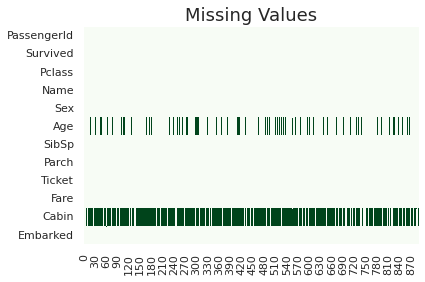

In [ ]:
#A continuación, Mostramos la distribución de valores perdidos para cada característica en forma de gráfico.
sns.heatmap(df_train.isnull().transpose(), cbar=False, cmap='Greens');
plt.title('Missing Values', fontsize=(18));

In [ ]:
df_train['Cabin'].isnull().sum()

687

In [ ]:
df_train['Age'].isnull().sum()

177

In [ ]:
def missing_data (df, col):
    data_percentage = 100*(df[col].isnull().sum()/len(df))
    data_percentage = round(data_percentage, 1)
    
    print('{}% of the data in {} are missing'.format(data_percentage,col))

In [ ]:
missing_data(df_train,'Cabin')

77.1% of the data in Cabin are missing


In [ ]:
missing_data(df_train, 'Age')

19.9% of the data in Age are missing


In [ ]:
missing_data(df_train, 'Embarked')

0.2% of the data in Embarked are missing


**Preprocesamiento de datos**

In [ ]:
#Mostramos las categorías en las que se divide la columna 'Embarque'
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#.mode() Mostramos la categoría con mayor frecuencia en 'Embarque'
df_train['Embarked'].mode()

0    S
dtype: object

In [ ]:
#Correlacion entre la columna 'Edad' y las demás características
age_correlation = df_train.corr()['Age'].sort_values()
age_correlation.drop('Age', inplace=True)
pd.DataFrame(age_correlation.values, columns=['Correlation'], index=age_correlation.keys())

,Correlation
Pclass,-0.369226
SibSp,-0.308247
Parch,-0.189119
Survived,-0.077221
PassengerId,0.036847
Fare,0.096067


In [ ]:
#Existe una mayor correlación con Pclass
df_train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
#Sustituimos los valores nulos por la categoría de mayor frecuencia en la columna 'Embarque'.
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

#Imputación de datos perdidos por edad.
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.median()))

#Eliminamos la columna de la cabina que tiene muchos datos perdidos.
df_train.drop(['Cabin'], axis=1, inplace=True)

#Hemos eliminado columnas que no creo necesarias para el análisis.
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Discover Missing Data in Test Dataset**:

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

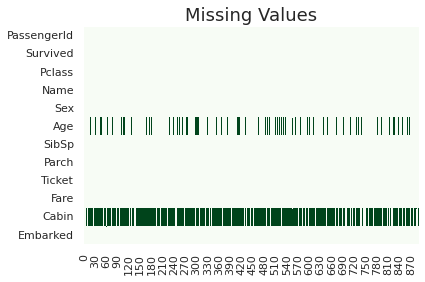

In [ ]:
#A continuación, Mostramos la distribución de valores perdidos para cada característica en forma de gráfico.
sns.heatmap(df_train.isnull().transpose(), cbar=False, cmap='Greens');
plt.title('Missing Values', fontsize=(18));

In [ ]:
missing_data(df_test,'Cabin')

78.2% of the data in Cabin are missing


In [ ]:
missing_data(df_test,'Age')

20.6% of the data in Age are missing


In [ ]:
missing_data(df_test,'Fare')

0.2% of the data in Fare are missing


In [ ]:
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.median()))
df_test.drop(['Cabin'], axis=1, inplace=True)
df_test = df_test.drop([ 'Name', 'Ticket'], axis=1)

In [ ]:
df_test['Fare'].mean()
df_test['Fare'].fillna(df_train['Fare'].mean(), inplace=True)

**Target vs. Numerical Features Bivariate Analysis**

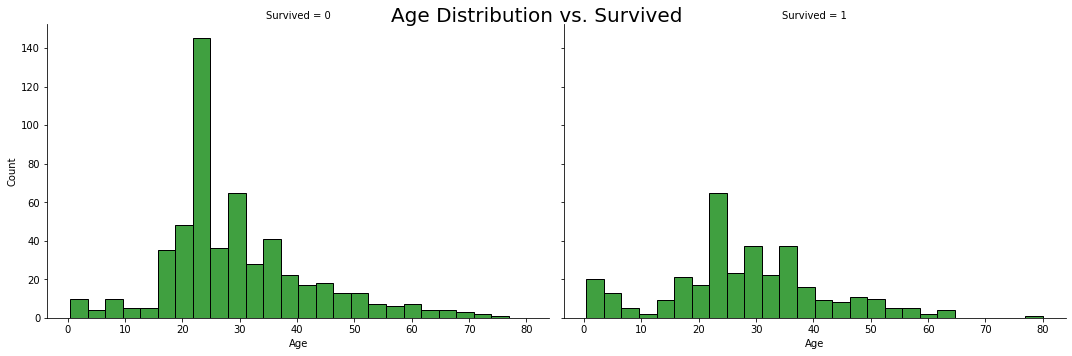

In [ ]:
sns.displot(x='Age', data=df_train, col='Survived', color='green', height=5, aspect=1.5)
plt.suptitle('Distribución por edades vs. supervivientes', fontsize=20)
plt.tight_layout()
plt.show()

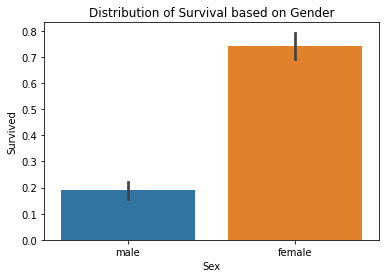

In [ ]:
#Relacion entre genero y supervivencia
sns.barplot(x="Sex", y="Survived", data=df_train)
plt.title("Distribucion de la supervivencia basado en el genero")
plt.show()

Categorical Features Encoding
Training Dataset Basic Information after Data Cleaning

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Sex_male     418 non-null    uint8  
 6   Embarked_Q   418 non-null    uint8  
 7   Embarked_S   418 non-null    uint8  
 8   Pclass_2     418 non-null    uint8  
 9   Pclass_3     418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [ ]:
corr_matrix = df_train.corr(method='pearson')
corr_matrix

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
Survived,1.000000,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683,0.093349,-0.322308
Age,-0.047255,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.015733,0.029242,-0.355026
SibSp,-0.035322,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734,-0.055932,0.092548
Parch,0.081629,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814,-0.000734,0.015790
Fare,0.257307,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184,-0.118557,-0.413333
Sex_male,-0.543351,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224,-0.064746,0.137143
Embarked_Q,0.003650,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421,-0.127301,0.237449
Embarked_S,-0.149683,0.015733,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000,0.189980,-0.015104
Pclass_2,0.093349,0.029242,-0.055932,-0.000734,-0.118557,-0.064746,-0.127301,0.189980,1.000000,-0.565210
Pclass_3,-0.322308,-0.355026,0.092548,0.015790,-0.413333,0.137143,0.237449,-0.015104,-0.565210,1.000000


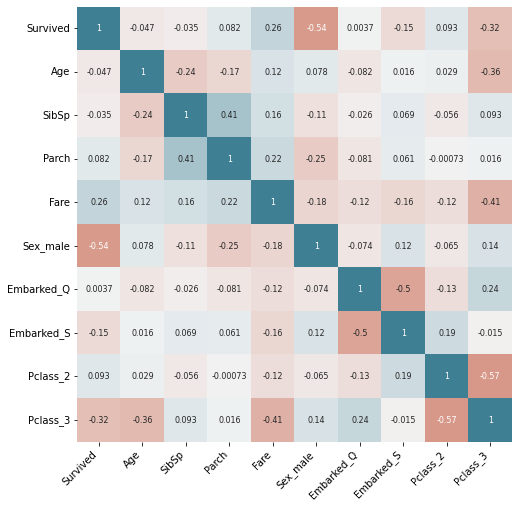

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

**Conclusion: Pcalss & Sex are the most important features in target estimation.**

**Application of Algorithms**

In [ ]:
#Separate column with survivor information
#We separate into training and testing
x = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

In [ ]:
def matriz_confusion (y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm).plot

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Support Vector Machines**

In [ ]:
svc = svm.SVC(kernel='rbf', gamma= 0.3 , class_weight='balanced', random_state=55, max_iter=10000)
svc.fit(x_train, y_train)
y_pred1 = svc.predict(x_test)
print('Precision Maquina de Soporte: ')
print(svc.score(x_train, y_train))

Precision Maquina de Soporte: 
0.9353932584269663


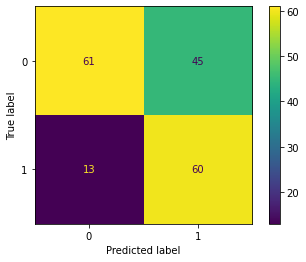

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm).plot()

**Logistic Regression**

In [ ]:
import warnings
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
print('Precision Regresion Logistica: ')
print(logreg.score(x_train, y_train))

Precision Regresion Logistica: 
0.7991573033707865


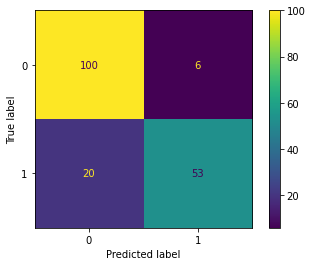

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm).plot()

**k neighbords (Vecinos Cercanos)**

In [ ]:
Kn = KNeighborsClassifier(n_neighbors=3)
Kn.fit(x_train, y_train)
y_pred3 = Kn.predict(x_test)
print('Precision Vecinos Cercanos: ')
print(Kn.score(x_train, y_train))

Precision Vecinos Cercanos: 
0.8230337078651685


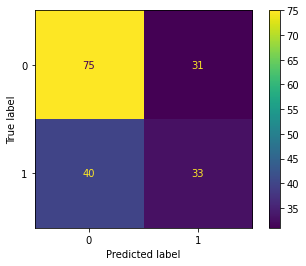

In [ ]:
cm = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay(cm).plot()

**Prediccion usando los modelos ML:**

In [ ]:
id_s = df_test['PassengerId']

In [ ]:
#Maquina de soporte vectorial
prediccion_svm = svc.predict(df_test.drop('PassengerId', axis=1))
salida_svc = pd.DataFrame({'PassengerId': id_s,
                           'Survived': prediccion_svm})
print('Prediccion Maquina de Soporte: ')
print(salida_svc.head())
print(salida_svc.iloc[100:106, :])

Prediccion Maquina de Soporte: 
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0
     PassengerId  Survived
100          992         1
101          993         1
102          994         0
103          995         0
104          996         1
105          997         0


In [ ]:
#Regresion Logistica
prediccion_logreg = logreg.predict(df_test.drop('PassengerId', axis=1))
salida_logreg = pd.DataFrame({'PassengerId': id_s,
                              'Survived': prediccion_logreg})
print('Prediccion Regresion Logistica: ')
print(salida_logreg.head(10))


Prediccion Regresion Logistica: 
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


In [ ]:
#Vecinos Cercanos
prediccion_kn = Kn.predict(df_test.drop('PassengerId', axis=1))
salida_kn = pd.DataFrame({'PassengerId': id_s,
                          'Survived': prediccion_kn})
print('Prediccion VecinOs Cercanos: ')
print(salida_kn.head(10))

Prediccion VecinOs Cercanos: 
   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         0
5          897         0
6          898         0
7          899         1
8          900         0
9          901         1


Podemos decir que el modelo que mas acerto en la prediccion para este dataset es el de Maquinas de Soporte Vectorial con:
*   Verdaderos Positivos: 53
*   Falsos Positivos: 20
*   Verdaderos Negativos: 100
*   Falsos Negativos: 6

Aun estando lejos de una Buena precision con un score de 0.7991573033707865 